In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False)

# Data augmentation
def augment(features):
    image = features['image']
    image = tf.image.resize(image, (128, 128))  # Resize to 128x128
    image = tf.image.random_flip_left_right(image)  # Randomly flip the image horizontally
    image = tf.image.random_brightness(image, max_delta=0.1)  # Randomly change the brightness
    image = image / 255.0  # Normalize to [0,1]
    label = features['label']
    return image, label

# Preprocess the data
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (128, 128))  # Resize to 128x128
    image = image / 255.0  # Normalize to [0,1]
    label = features['label']
    return image, label

train_dataset = train_dataset.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Create your model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to avoid overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/20
582/582 [==============================] - 38s 52ms/step - loss: 0.6609 - accuracy: 0.5915 - val_loss: 0.6004 - val_accuracy: 0.6898
Epoch 2/20
582/582 [==============================] - 30s 51ms/step - loss: 0.5300 - accuracy: 0.7384 - val_loss: 0.4844 - val_accuracy: 0.7672
Epoch 3/20
582/582 [==============================] - 37s 63ms/step - loss: 0.4265 - accuracy: 0.8076 - val_loss: 0.3847 - val_accuracy: 0.8265
Epoch 4/20
582/582 [==============================] - 29s 49ms/step - loss: 0.3591 - accuracy: 0.8420 - val_loss: 0.3607 - val_accuracy: 0.8362
Epoch 5/20
582/582 [==============================] - 29s 49ms/step - loss: 0.3159 - accuracy: 0.8620 - val_loss: 0.3090 - val_accuracy: 0.8648
Epoch 6/20
582/582 [==============================] - 30s 52ms/step - loss: 0.2739 - accuracy: 0.8823 - val_loss: 0.3566 - val_accuracy: 0.8424
Epoch 7/20
582/582 [==============================] - 30s 52ms/step - loss: 0.2416 - accuracy: 0.8989 - val_loss: 0.3047 - val_accuracy:

In [3]:
# Report the accuracy on your test set
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

146/146 [==============================] - 6s 40ms/step - loss: 0.2864 - accuracy: 0.8813
Test Accuracy: 88.13%


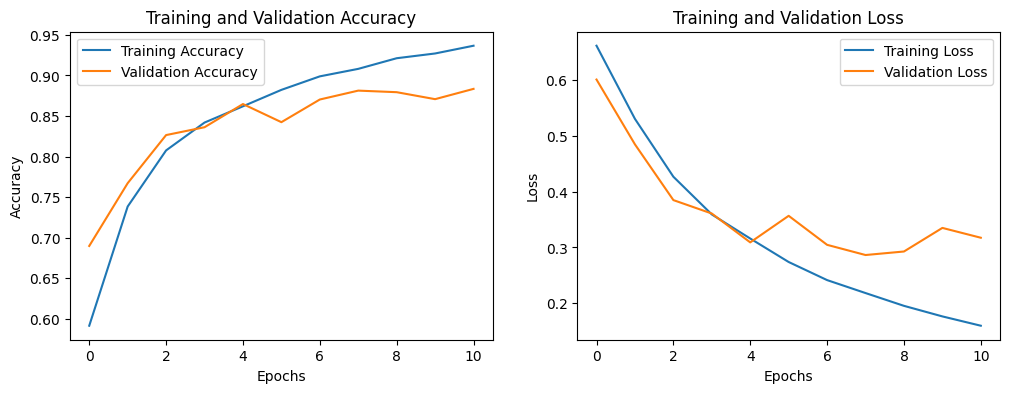

In [4]:
import matplotlib.pyplot as plt


# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()